In [1]:
import pandas as pd
recent = pd.read_csv("data_94_21.csv")
past = pd.read_csv("data_80_94.csv")

In [34]:
sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [2]:
recent['Platform'].value_counts()

DS      2110
PS2     2109
PS3     1291
Wii     1279
X360    1226
PSP     1186
PS      1178
PC       922
XB       794
GBA      780
GC       538
3DS      494
PSV      404
PS4      332
N64      311
XOne     212
SAT      170
WiiU     143
SNES     141
GB        66
DC        52
GEN       12
NG        10
WS         6
SCD        5
3DO        3
TG16       2
PCFX       1
NES        1
Name: Platform, dtype: int64

In [3]:
recent[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].groupby(recent["Platform"]).mean().sort_values(by="NA_Sales", ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
GB,852121.212121,513181.818182,803030.348485,84545.454545
X360,463605.231648,220995.107667,9877.650897,67479.608483
GEN,434166.666667,140000.000000,77500.000000,25833.333333
N64,424180.077170,120321.546624,104212.221865,13601.286174
XOne,391367.919811,208018.863208,1603.773585,56179.245283
Wii,383033.621579,203096.168100,50985.144644,61133.698202
PS3,298923.314485,261564.678544,60255.615802,108024.785438
PS,282385.395586,178421.051783,116341.255518,34091.680815
PS4,279186.746988,362198.792169,41566.265060,125993.975904


1. 지역별 데이터 시각화
1. 플랫폼별 데이터 시각화
1. 시기별 시각화

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
recent.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Battle Arena Toshinden,PS,1994,Fighting,Sony Computer Entertainment,390000,260000,530000,80000
1,Yuu Yuu Hakusho: Makyo Toitsusen,GEN,1994,Fighting,Sega,0,0,80000,0
2,Super Famista 3,SNES,1994,Sports,Namco Bandai Games,0,0,390000,0
3,Jikkyou Powerful Pro Yakuu '94,SNES,1994,Sports,Konami Digital Entertainment,0,0,410000,0
4,NBA Jam,SNES,1994,Sports,Acclaim Entertainment,1190000,160000,0,30000


In [5]:
pd.pivot_table(data=recent, index=['Platform', 'Year'])

EU_Sales       JP_Sales       NA_Sales   Other_Sales
Platform Year                                                           
3DO      1994       0.000000   20000.000000       0.000000      0.000000
         1995       0.000000   40000.000000       0.000000      0.000000
3DS      2011  159652.173913  110608.695652  228956.513043  37565.217391
         2012  124623.655914  214193.548387  183225.795699  27204.301075
         2013  114157.303371  213370.786517  114157.303371  19662.921348
...                      ...            ...            ...           ...
XB       2008   40000.000000       0.000000  130000.000000  10000.000000
XOne     2013  278421.052632    1052.631579  621052.631579  78947.368421
         2014  265901.639344    2295.081967  494918.032787  67868.852459
         2015  230256.397436    2179.487179  439615.371795  66923.076923
         2016   85740.740741     185.185185  123888.888889  19444.444444

[200 rows x 4 columns]

In [6]:
tmp = pd.pivot_table(data=recent, index=['Platform', 'Year']).reset_index()
tmp.head()

,Platform,Year,EU_Sales,JP_Sales,NA_Sales,Other_Sales
0,3DO,1994,0.000000,20000.000000,0.000000,0.000000
1,3DO,1995,0.000000,40000.000000,0.000000,0.000000
2,3DS,2011,159652.173913,110608.695652,228956.513043,37565.217391
3,3DS,2012,124623.655914,214193.548387,183225.795699,27204.301075
4,3DS,2013,114157.303371,213370.786517,114157.303371,19662.921348


<AxesSubplot:xlabel='Platform', ylabel='NA_Sales'>

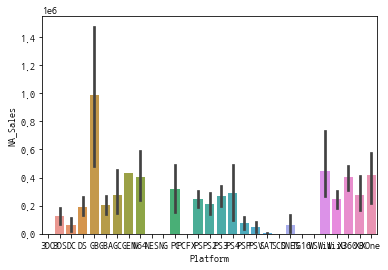

In [7]:
sns.barplot(data=tmp, x='Platform', y='NA_Sales')

In [8]:
by_region = pd.melt(tmp, id_vars=["Platform", 'Year'])

Text(0.5, 1.0, 'Mean of Sales by Region')

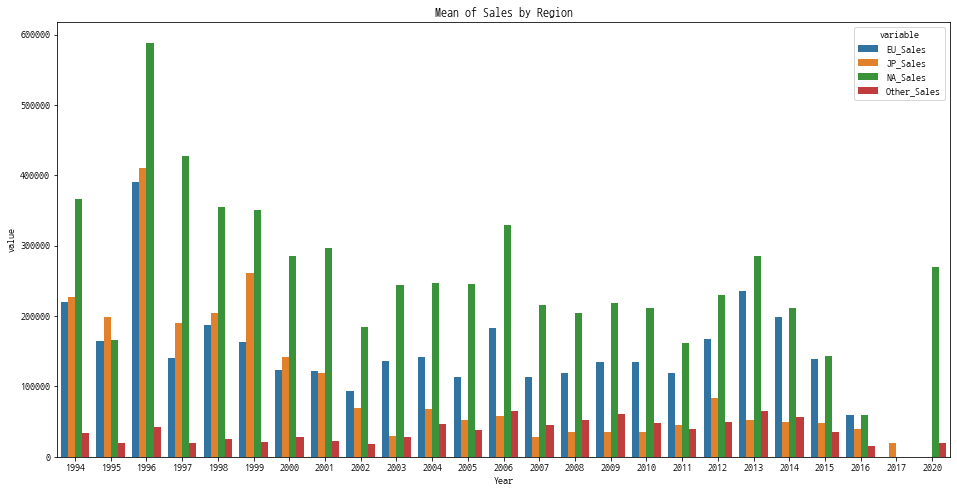

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
fig = sns.barplot(data=by_region, x='Year', y='value', hue='variable', ci=None)
ax.set_title("Mean of Sales by Region")

- 북미지역 판매량이 항상 가장많음 (집중해야할 지역)
- 일본 판매량은 줄어들었고, 유럽은 증가한 것으로 보임

Text(0.5, 1.0, 'Mean of Sales by Region')

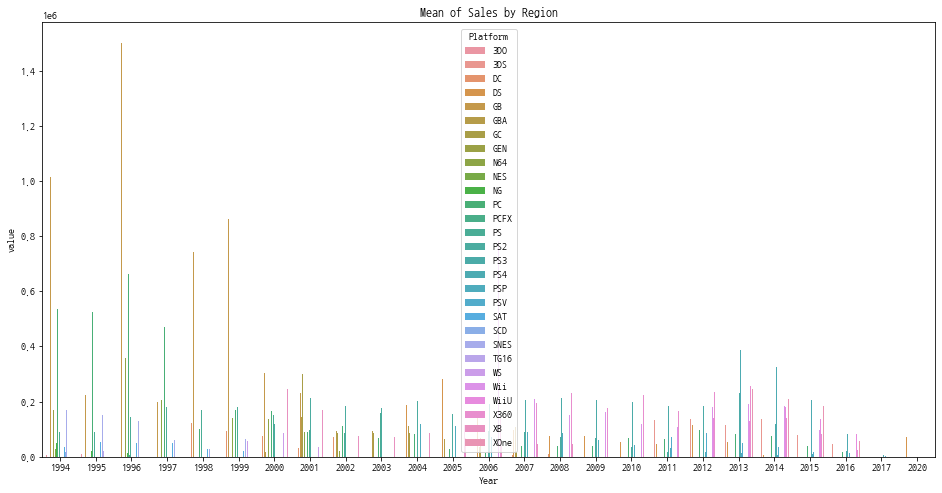

In [10]:
fig, ax = plt.subplots(figsize=(16,8))
fig = sns.barplot(data=by_region, x='Year', y='value', hue='Platform', ci=None)
ax.set_title("Mean of Sales by Region")

In [11]:
top8 = tmp['Platform'].value_counts()[:8].index.to_list()

In [12]:
top8_platform = tmp[tmp['Platform'].isin(top8)].melt(id_vars=["Platform", 'Year'])
#pd.melt(tmp, id_vars=["Platform", 'Year'])
top8_platform.head()

,Platform,Year,variable,value
0,DS,2004,EU_Sales,172608.695652
1,DS,2005,EU_Sales,365478.260870
2,DS,2006,EU_Sales,117650.000000
3,DS,2007,EU_Sales,91861.702128
4,DS,2008,EU_Sales,66413.934426


Text(0.5, 1.0, 'Mean of Sales by Region')

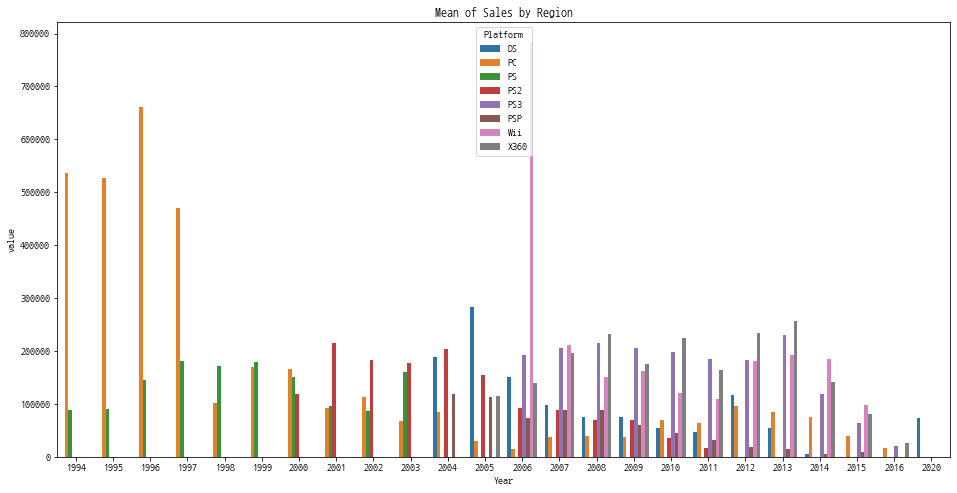

In [13]:
fig, ax = plt.subplots(figsize=(16,8))
fig = sns.barplot(data=top8_platform, x='Year', y='value', hue='Platform', ci=None)
ax.set_title("Mean of Sales by Region")

가장 많은 게임을 출시한 플랫폼 상위 8개의 변화를 보면,  
PC는 급격하게 감소했고, 플레이스테이션, Xbox, Wii와 같은 콘솔 게임이 많이 팔렸다는 것을 알 수 있다.  
PC보다는 콘솔, 그중에서 어떤 플랫폼이 좋을지 알아봐야 할듯

In [14]:
genre = pd.pivot_table(data=recent, index=['Genre', 'Year']).reset_index()
genre.head()

,Genre,Year,EU_Sales,JP_Sales,NA_Sales,Other_Sales
0,Action,1994,30000.000000,210000.000000,142500.000000,5000.000000
1,Action,1995,64285.714286,120000.000000,247142.857143,15714.285714
2,Action,1996,294000.000000,131000.000000,532499.950000,72500.000000
3,Action,1997,326896.551724,65517.241379,487931.034483,48965.517241
4,Action,1998,270454.522727,126136.363636,457954.522727,41136.363636


In [15]:
gens = pd.melt(genre, id_vars=["Genre", 'Year'])

Text(0.5, 1.0, 'Mean of Sales by Genre')

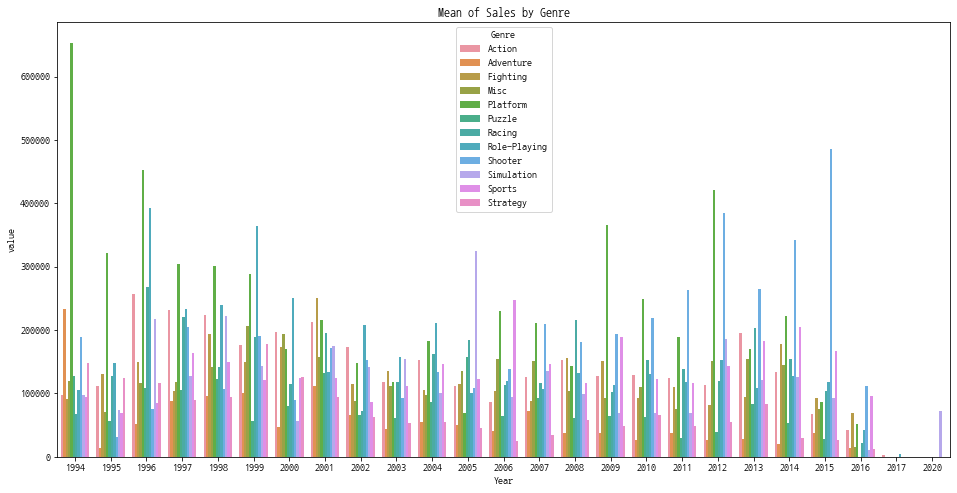

In [16]:
fig, ax = plt.subplots(figsize=(16,8))
fig = sns.barplot(data=gens, x='Year', y='value', hue='Genre', ci=None)
ax.set_title("Mean of Sales by Genre")

In [17]:
recent['Genre'].value_counts()#.index.to_list()

Action          3145
Sports          2244
Misc            1657
Role-Playing    1427
Adventure       1255
Shooter         1230
Racing          1194
Simulation       833
Platform         807
Fighting         806
Strategy         655
Puzzle           525
Name: Genre, dtype: int64

In [18]:
recent

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Battle Arena Toshinden,PS,1994,Fighting,Sony Computer Entertainment,390000,260000,530000,80000
1,Yuu Yuu Hakusho: Makyo Toitsusen,GEN,1994,Fighting,Sega,0,0,80000,0
2,Super Famista 3,SNES,1994,Sports,Namco Bandai Games,0,0,390000,0
3,Jikkyou Powerful Pro Yakuu '94,SNES,1994,Sports,Konami Digital Entertainment,0,0,410000,0
4,NBA Jam,SNES,1994,Sports,Acclaim Entertainment,1190000,160000,0,30000
...,...,...,...,...,...,...,...,...,...
15773,Winning Post 8 2016,PS4,2016,Simulation,Tecmo Koei,0,0,20000,0
15774,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,10000,0
15775,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,10000,0
15776,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,30000,0


<AxesSubplot:xlabel='Year'>

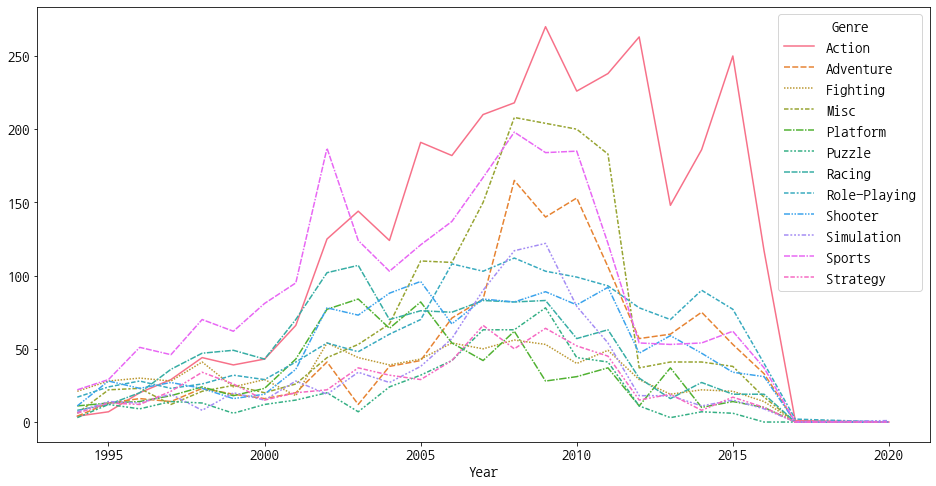

In [19]:
crtab = pd.crosstab(recent['Year'], recent['Genre'])
plt.figure(figsize=(16, 8))
plt.rc('font', size=15)
sns.lineplot(data=crtab)

Misc는 장르 미정인 항목

In [22]:
recent.sort_values(by='NA_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5883,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000
8658,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000
10251,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000,11010000,3280000,2960000
11818,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14970000,4940000,240000,1670000
9380,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000,7060000,4700000,2260000
5726,Wii Play,Wii,2006,Misc,Nintendo,14030000,9200000,2930000,2850000
6211,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000,9230000,6500000,2900000
424,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000
5186,Mario Kart DS,DS,2005,Racing,Nintendo,9810000,7570000,4130000,1920000
11005,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9670000,3730000,110000,1130000


In [26]:
top_recent_NA = recent.sort_values(by='NA_Sales', ascending=False)
top_recent_NA[top_recent_NA['Year'] >= 2010].head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11818,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14970000,4940000,240000,1670000
11005,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9670000,3730000,110000,1130000
12930,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9030000,4280000,130000,1320000
13338,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8250000,4300000,70000,1120000
13909,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000,9270000,970000,4139999
14103,Call of Duty: Ghosts,X360,2013,Shooter,Activision,6720000,2630000,40000,820000
13576,Halo 4,X360,2012,Shooter,Microsoft Game Studios,6630000,2360000,40000,730000
12249,Just Dance 3,Wii,2011,Misc,Ubisoft,6050000,3150000,0,1070000
11123,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5980000,4440000,480000,1830000
11274,Just Dance 2,Wii,2010,Misc,Ubisoft,5840000,2890000,10000,780000


In [23]:
recent.sort_values(by='EU_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
5883,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000
8658,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000
10251,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000,11010000,3280000,2960000
5153,Nintendogs,DS,2005,Simulation,Nintendo,9070000,11000000,1930000,2750000
13909,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000,9270000,970000,4139999
5096,Brain Age: Train Your Brain in Minutes a Day,DS,2005,Misc,Nintendo,4750000,9260000,4160000,2049999
6211,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000,9230000,6500000,2900000
5726,Wii Play,Wii,2006,Misc,Nintendo,14030000,9200000,2930000,2850000
424,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000
10329,Wii Fit Plus,Wii,2009,Sports,Nintendo,9090000,8590000,2530000,1790000


In [27]:
top_recent_EU = recent.sort_values(by='EU_Sales', ascending=False)
top_recent_EU[top_recent_EU['Year'] >= 2010].head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
13909,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000,9270000,970000,4139999
15111,FIFA 16,PS4,2015,Sports,Electronic Arts,1110000,6060000,60000,1260000
13312,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4990000,5880000,650000,2520000
12967,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5540000,5820000,490000,1620000
14503,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3800000,5810000,360000,2020000
15343,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5770000,5810000,350000,2310000
13945,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9,5310000,60000,1380000
13464,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1060000,5050000,130000,2009999
11818,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14970000,4940000,240000,1670000
11311,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2960000,4880000,810000,2120000


In [24]:
recent.sort_values(by='JP_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
424,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000
1551,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9000000,6180000,7200000,710000
6211,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000,9230000,6500000,2900000
6280,Pokemon Diamond/Pokemon Pearl,DS,2006,Role-Playing,Nintendo,6420000,4520000,6040000,1370000
2477,Pokemon Ruby/Pokemon Sapphire,GBA,2002,Role-Playing,Nintendo,6060000,3900000,5380000,500000
5381,Animal Crossing: Wild World,DS,2005,Simulation,Nintendo,2550000,3520000,5330000,880000
5361,Brain Age 2: More Training in Minutes a Day,DS,2005,Puzzle,Nintendo,3440000,5360000,5320000,1180000
11449,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0,0,4870000,0
9380,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000,7060000,4700000,2260000
13485,Animal Crossing: New Leaf,3DS,2012,Simulation,Nintendo,2009999,2320000,4360000,410000


In [28]:
top_recent_JP = recent.sort_values(by='JP_Sales', ascending=False)
top_recent_JP[top_recent_JP['Year'] >= 2010].head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
11449,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0,0,4870000,0
13485,Animal Crossing: New Leaf,3DS,2012,Simulation,Nintendo,2009999,2320000,4360000,410000
13731,Monster Hunter 4,3DS,2013,Role-Playing,Capcom,0,0,3440000,0
14562,Yokai Watch 2 Ganso/Honke,3DS,2014,Role-Playing,Nintendo,30000,0,3180000,0
13430,Pokemon Black 2/Pokemon White 2,DS,2012,Role-Playing,Nintendo,2910000,1860000,3140000,430000
14296,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,Nintendo,4230000,3370000,3080000,650000
15104,Monster Hunter X,3DS,2015,Action,Capcom,250000,190000,2780000,40000
14363,Yokai Watch 2 Shinuchi,3DS,2014,Role-Playing,Level 5,0,0,2680000,0
12817,Mario Kart 7,3DS,2011,Racing,Nintendo,4740000,3910000,2670000,890000
14378,Monster Hunter 4 Ultimate,3DS,2014,Role-Playing,Nintendo,670000,490000,2620000,110000


일본의 취향은 한결같다.  
유럽, 북미는 닌텐도에서 PS or Xbox로 넘어갔다 (닌텐도게임에서 슈팅액션장르)  


### 지역별 판매비중 연도별로 확인
- 연도별 판매량 총합계산
- 지역별 비교

1. 북미 비중 매우높음 --> 중요 시장
1. 그리고 북미 시장이 2010년까지 성장세 매우 큼
1. 일본 판매량은 거의 일정한 느낌

In [96]:
data = pd.concat([past, recent])

In [97]:
year_sum = data.pivot_table(index=['Year'], aggfunc='sum').reset_index()
year_sum_melt = year_sum.iloc[:-2,:].melt(id_vars='Year', var_name='Region', value_name='Sales')

<AxesSubplot:xlabel='Year', ylabel='Sales'>

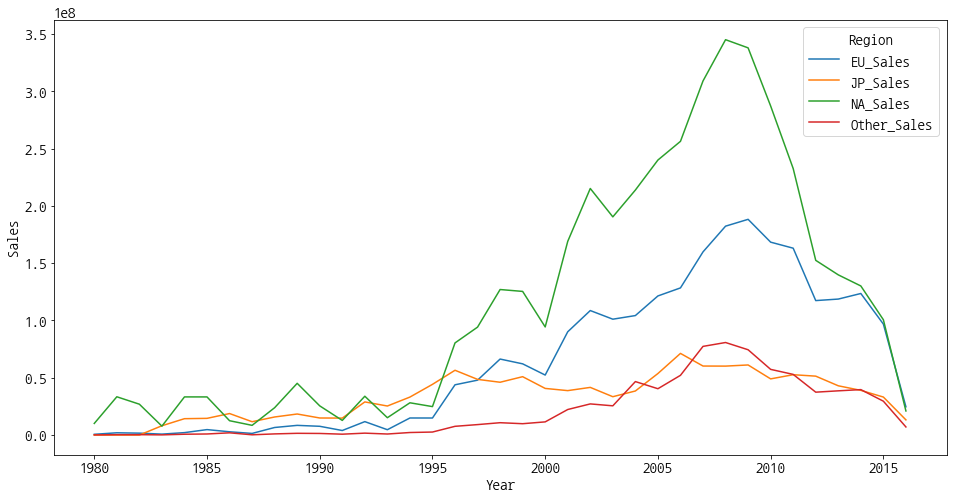

In [98]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=year_sum_melt, x='Year', y='Sales', hue='Region')

In [99]:
year_sum['Year_Total'] = year_sum[sales].sum(axis=1)
year_sum.tail()

,Year,EU_Sales,JP_Sales,NA_Sales,Other_Sales,Year_Total
34,2014,123559998,39000000,130140000,39650000,332349998
35,2015,96859999,33160000,100640000,29540000,260199999
36,2016,24650000,13230000,21010000,7050000,65940000
37,2017,0,50000,0,0,50000
38,2020,0,0,270000,20000,290000


In [100]:
for reg in sales:
    year_sum[reg+"_Ratio"] = year_sum[reg] / year_sum['Year_Total']
year_sum.head()

,Year,EU_Sales,JP_Sales,NA_Sales,Other_Sales,Year_Total,NA_Sales_Ratio,EU_Sales_Ratio,JP_Sales_Ratio,Other_Sales_Ratio
0,1980,640000,0,10130000,110000,10880000,0.931066,0.058824,0.000000,0.010110
1,1981,1960000,0,33400000,320000,35680000,0.936099,0.054933,0.000000,0.008969
2,1982,1650000,0,26920000,310000,28880000,0.932133,0.057133,0.000000,0.010734
3,1983,800000,8100000,7760000,140000,16800000,0.461905,0.047619,0.482143,0.008333
4,1984,2100000,14270000,33280000,700000,50350000,0.660973,0.041708,0.283416,0.013903


In [101]:
tmp = year_sum[['Year', 'NA_Sales_Ratio', 'EU_Sales_Ratio', 'JP_Sales_Ratio', 'Other_Sales_Ratio']].iloc[:-2,:].pivot_table(index='Year')

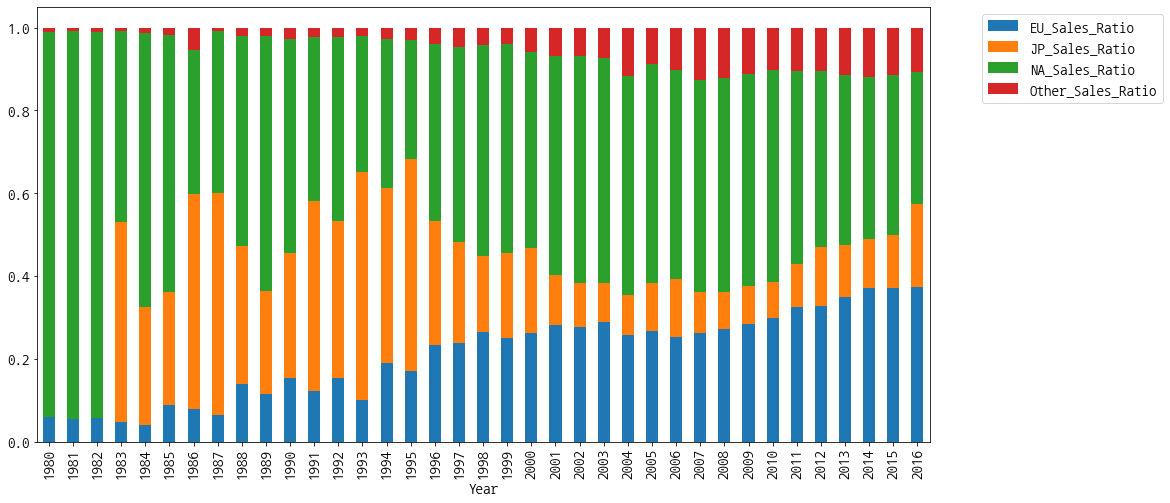

In [108]:
tmp.plot.bar(stacked=True, figsize=(16,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [109]:
data['Platform'].value_counts()

DS      2111
PS2     2109
PS3     1291
Wii     1279
X360    1226
PSP     1186
PS      1178
PC       929
XB       794
GBA      780
GC       538
3DS      494
PSV      404
PS4      332
N64      311
SNES     236
XOne     212
SAT      170
WiiU     143
2600     115
NES       97
GB        96
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [137]:
plat = data[['Year', 'Platform']+sales].iloc[:-2, :]
main_platform = plat[plat['Platform'].isin(['DS', 'PS3', 'Wii', 'PC', 'PS4', 'XOne'])]
target = main_platform[main_platform['Year'] >= 2000]

<AxesSubplot:title={'center':'출시작 수'}, xlabel='Year'>

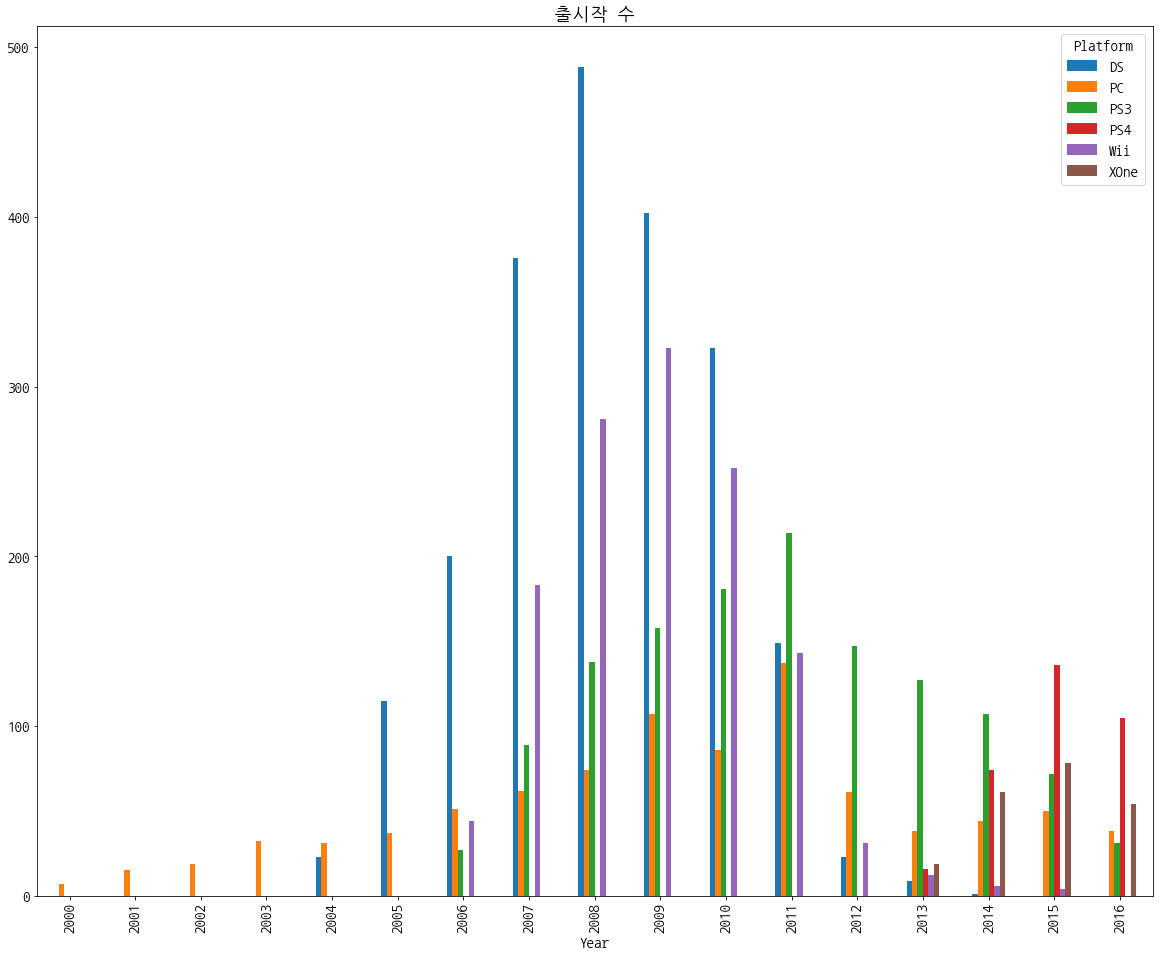

In [138]:
pd.crosstab(target['Year'], target['Platform']).plot.bar(figsize=(20,16), title="출시작 수")


몰락하는 닌텐도  
떠오르는 PS4  
다크호스 Xbox One
2000년대 중반부터 콘솔 판매량 급증(닌텐도 영향)  
반짝인기 Wii and DS

In [150]:
nintendo = main_platform[main_platform['Platform'].isin(['DS', 'Wii'])]
nintendo_melt = pd.melt(nintendo, id_vars=['Year', 'Platform'], var_name='Region', value_name='Sales')
nintendo_melt = nintendo_melt[nintendo_melt['Year'] > 1990]

In [154]:
ds_melt = nintendo_melt[nintendo_melt['Platform'] == 'DS'][['Year', 'Region', 'Sales']]

<AxesSubplot:xlabel='Year', ylabel='Sales'>

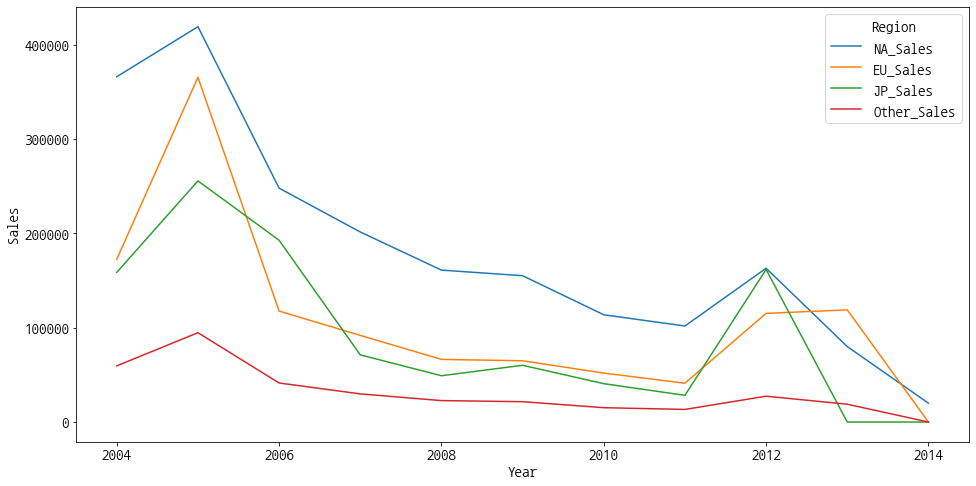

In [162]:
plt.figure(figsize=(16,8))
sns.lineplot(data=ds_melt, x='Year', y='Sales', hue='Region', ci=None)

In [163]:
wii_melt = nintendo_melt[nintendo_melt['Platform'] == 'Wii'][['Year', 'Region', 'Sales']]

<AxesSubplot:xlabel='Year', ylabel='Sales'>

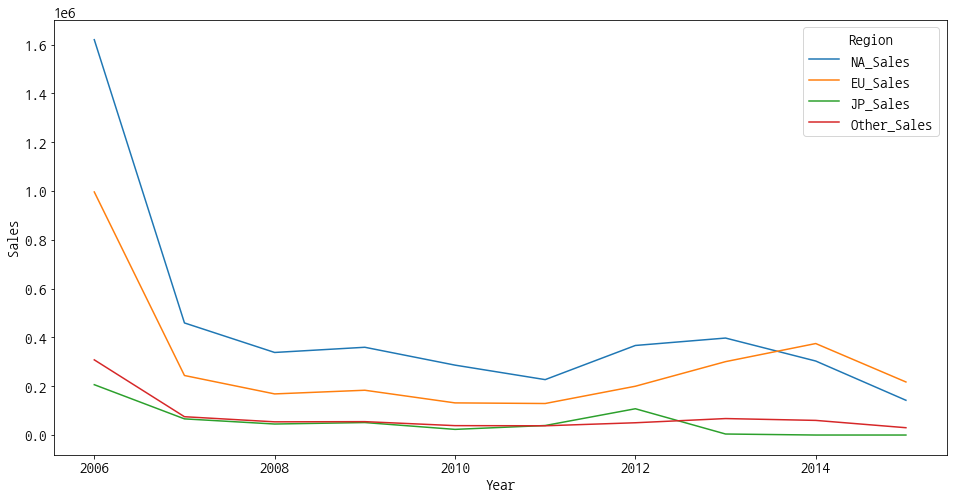

In [164]:
plt.figure(figsize=(16,8))
sns.lineplot(data=wii_melt, x='Year', y='Sales', hue='Region', ci=None)

In [173]:
import numpy as np

np.corrcoef(np.array(recent['NA_Sales'], recent['NA_Sales']))

1.0

In [171]:
data

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Boxing,2600,1980,Fighting,Activision,720000,40000,0,10000
1,Freeway,2600,1980,Action,Activision,320000,20000,0,0
2,Defender,2600,1980,Misc,Atari,990000,50000,0,10000
3,Checkers,2600,1980,Misc,Atari,220000,10000,0,0
4,Missile Command,2600,1980,Shooter,Atari,2560000,170000,0,30000
...,...,...,...,...,...,...,...,...,...
15773,Winning Post 8 2016,PS4,2016,Simulation,Tecmo Koei,0,0,20000,0
15774,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,10000,0
15775,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,10000,0
15776,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,30000,0


1. 미국시장 공략하자
1. 지역별로 잘팔리는게임? --> 그냥 다 똑같아 여기서 잘팔리면 저기서도 잘팔린다
1. PS4, Xbox One 콘솔이 대세
1. 각 sales ANOVA ㄱㄱ(판매량 차이에 유의미한 차이가 잇는가)


1. 94 ~ 04 / 05 ~ 10 / 11 ~ 16 3개 시기로 나눔
1. 각 시기별 게임 장르, 출고수량, 플랫폼 지역별 변화 
1. 각 시기별 지역에 따른 선호 장르 조사
